<a href="https://colab.research.google.com/github/ArjunRameshV/image_processing_for_auv/blob/master/Some_Morphing_techinques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
%matplotlib inline 

In [0]:
def display_g(img):
  plt.imshow(img,cmap='gray')
def display(img):
  plt.imshow(img)
def edge_det(img):
  edges = cv2.Canny(dst,100,200)
  display_g(edges)
def show_many(images):
  plt.figure(figsize=(60,40))
  columns = 3
  for i, image in enumerate(images):
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    plt.imshow(image,cmap='gray')
def show_all(images):
  plt.figure(figsize=(50,30))
  columns = 2
  for i, image in enumerate(images):
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    plt.imshow(image,cmap='gray')

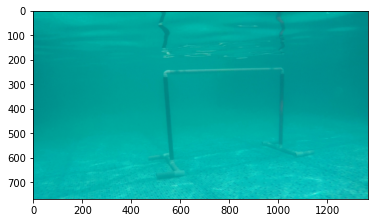

In [3]:
ori_img = cv2.imread("gate2.png")
img = cv2.cvtColor(ori_img,cv2.COLOR_BGR2RGB);
plt.imshow(img)

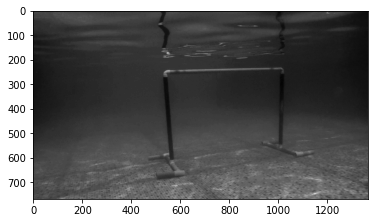

In [4]:
gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
plt.imshow(gray,cmap='gray')

Some carry over from the smoothing section 

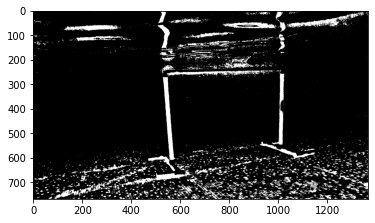

In [25]:
thresh2 = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,121,4)
display_g(thresh2)

In [0]:
kernel = np.ones((5,5),dtype=np.uint16)

Applying the morphological operation opening 

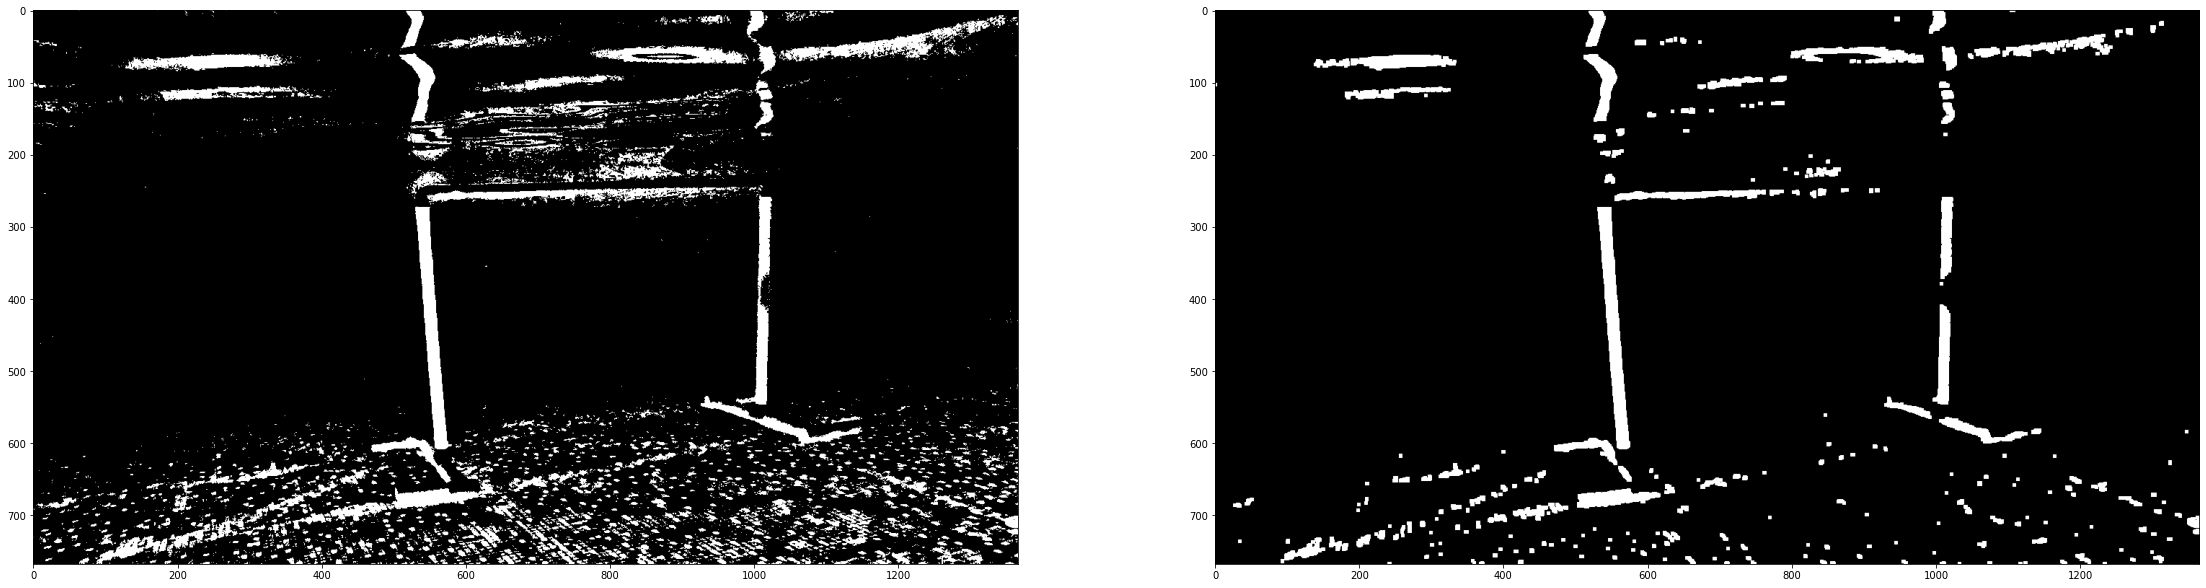

In [26]:
opening = cv2.morphologyEx(thresh2,cv2.MORPH_OPEN,kernel)
show_many([thresh2,opening])

truely black


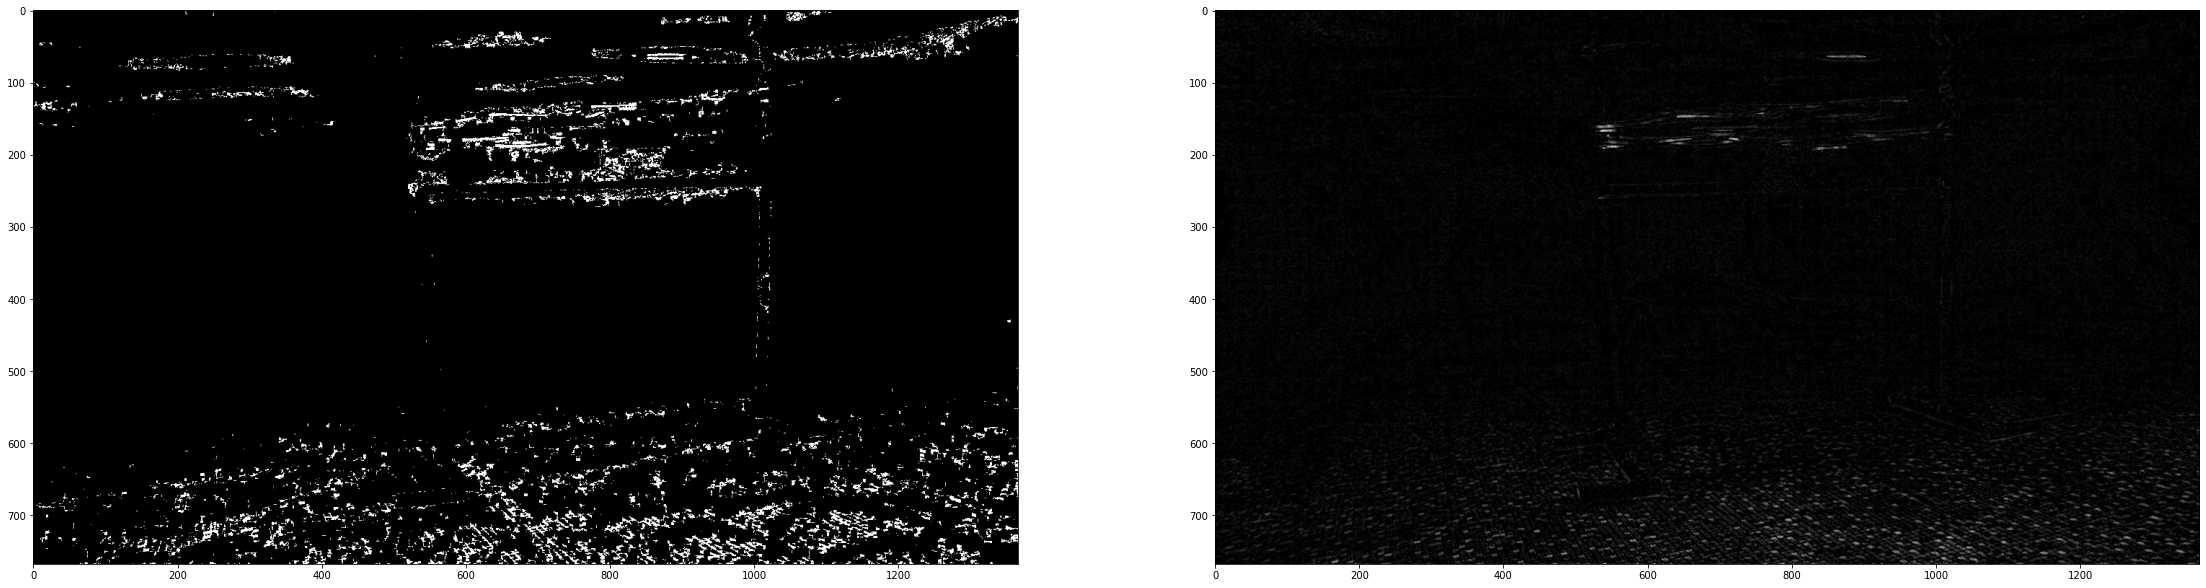

In [11]:
black_chat = cv2.morphologyEx(thresh2,cv2.MORPH_BLACKHAT,kernel)
black_chat_org = cv2.morphologyEx(gray,cv2.MORPH_BLACKHAT,kernel)
show_many([black_chat,black_chat_org])

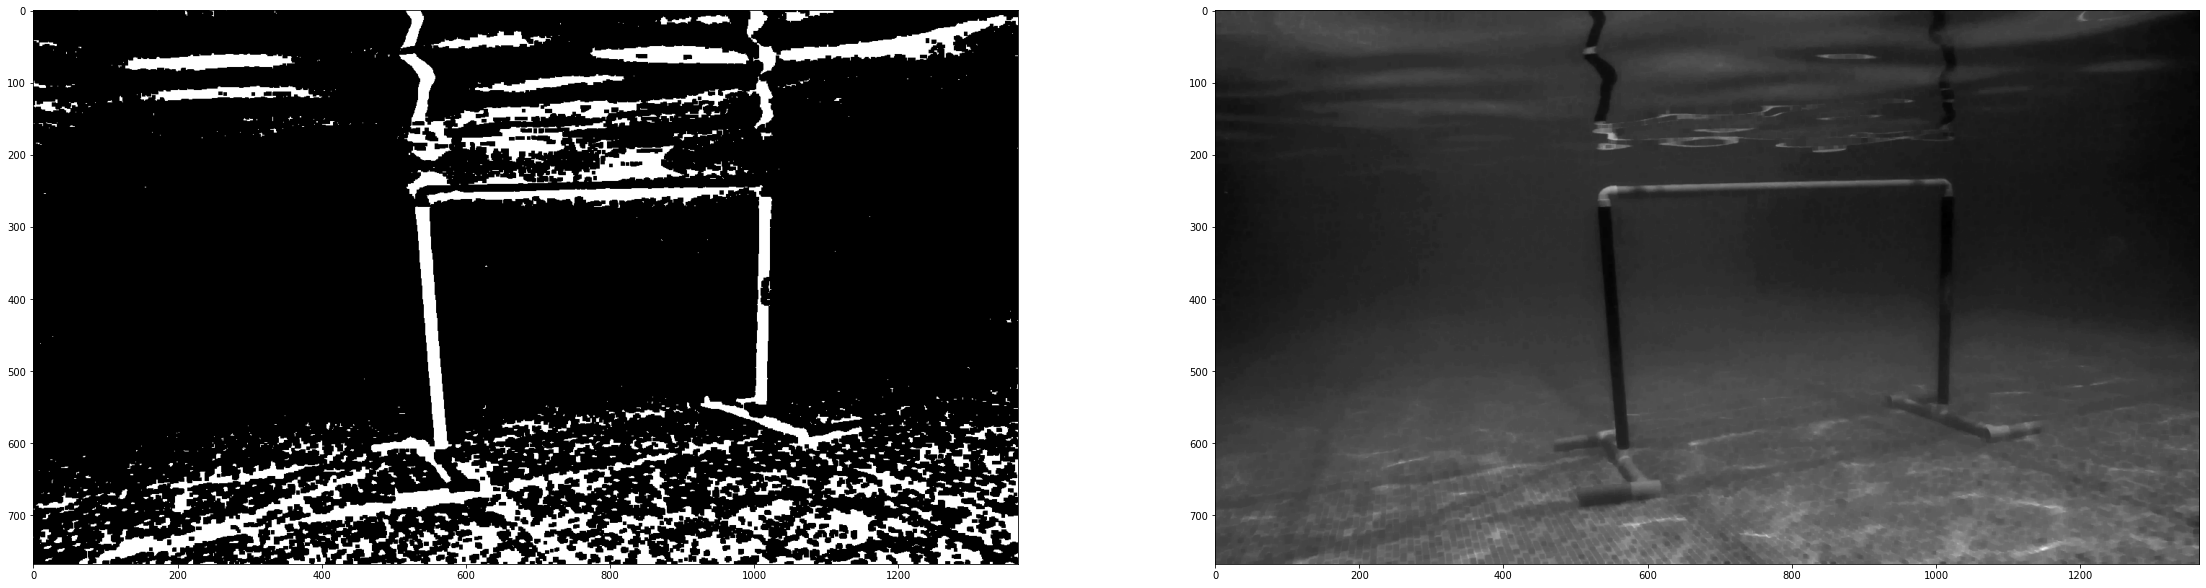

In [12]:
closing = cv2.morphologyEx(thresh2,cv2.MORPH_CLOSE,kernel)
closing_org = cv2.morphologyEx(gray,cv2.MORPH_CLOSE,kernel)
show_many([closing,closing_org])

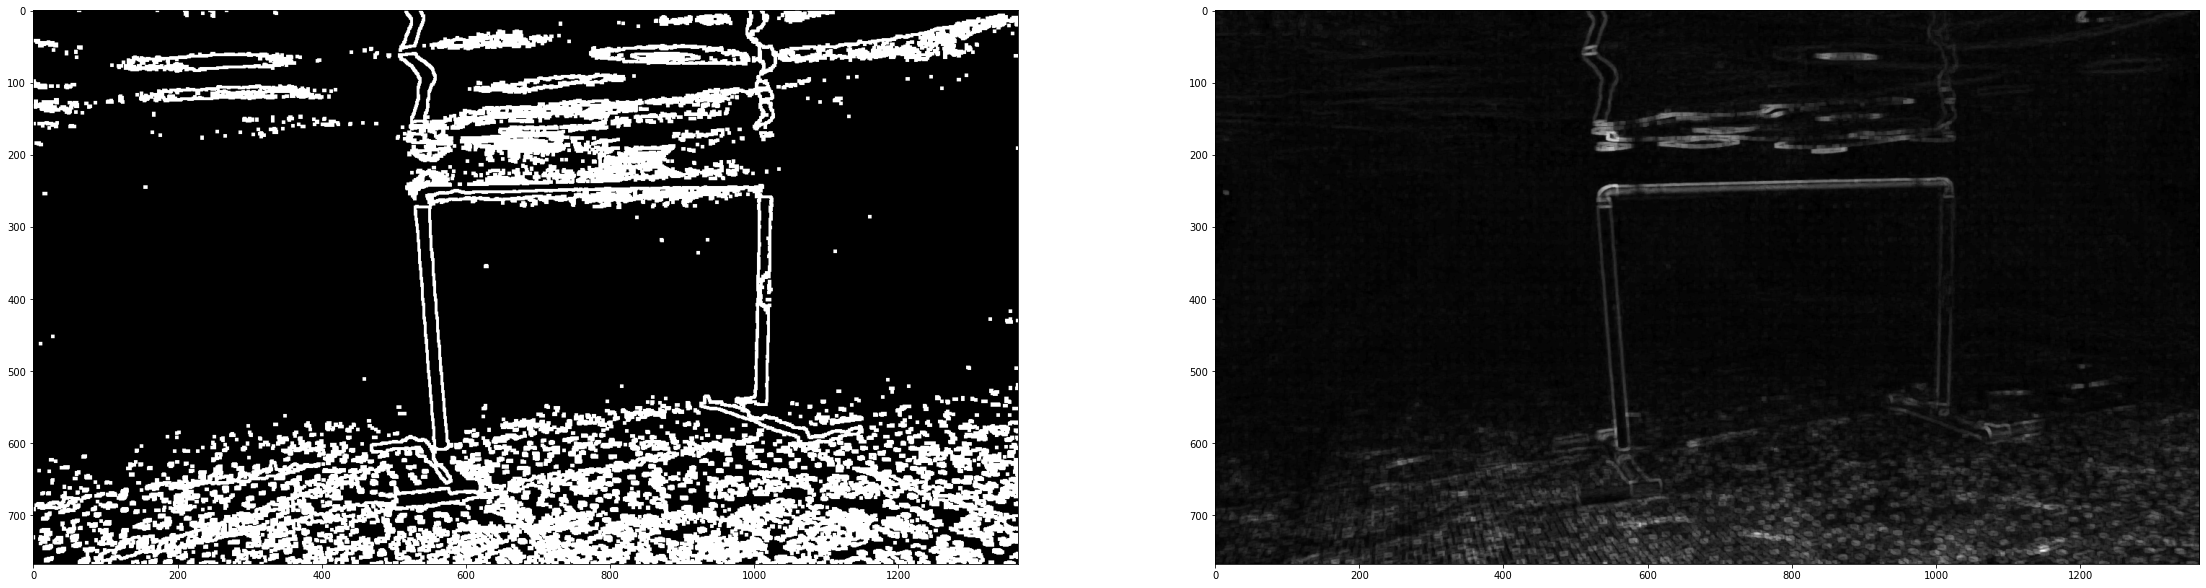

In [13]:
gradient = cv2.morphologyEx(thresh2,cv2.MORPH_GRADIENT,kernel)
gradient_org = cv2.morphologyEx(gray,cv2.MORPH_GRADIENT,kernel)
show_many([gradient,gradient_org])

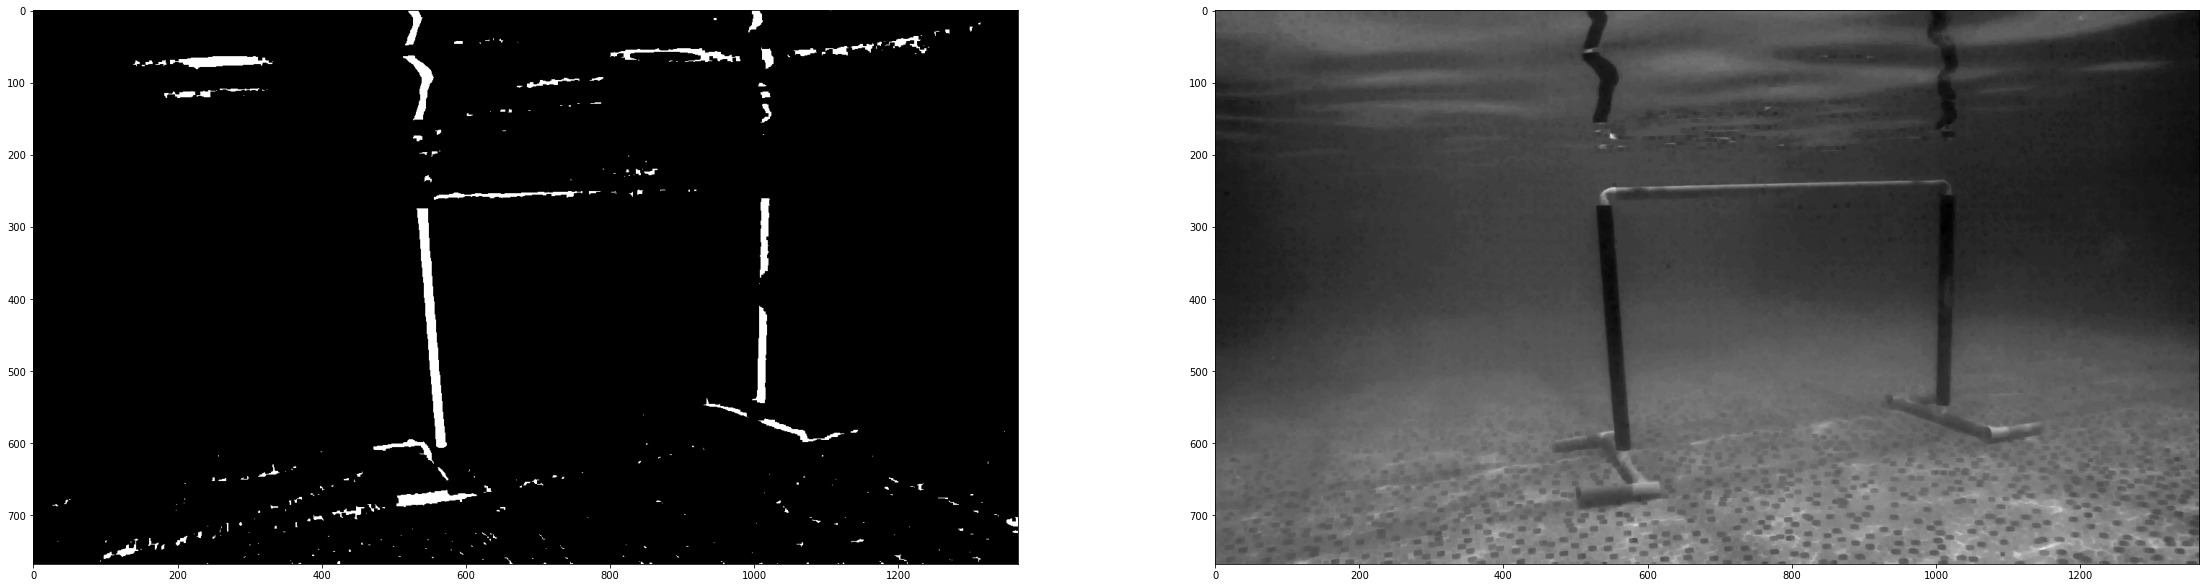

In [14]:
rect = cv2.morphologyEx(thresh2,cv2.MORPH_RECT,kernel)
rect_org = cv2.morphologyEx(gray,cv2.MORPH_RECT,kernel)
show_many([rect,rect_org])

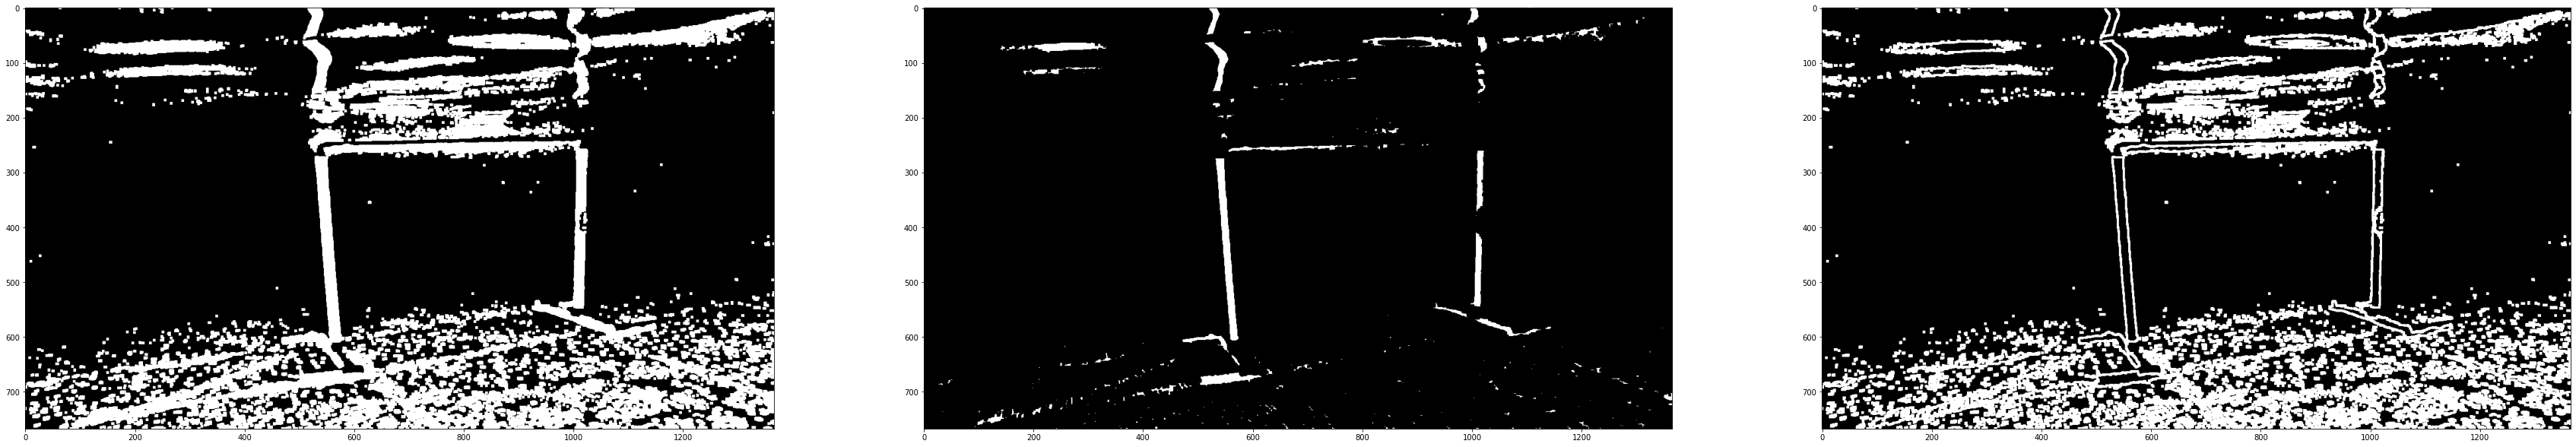

In [20]:
exp1 = cv2.bitwise_xor(rect,gradient)
show_many([exp1,rect,gradient])
#bitwise_and was an epic fail 

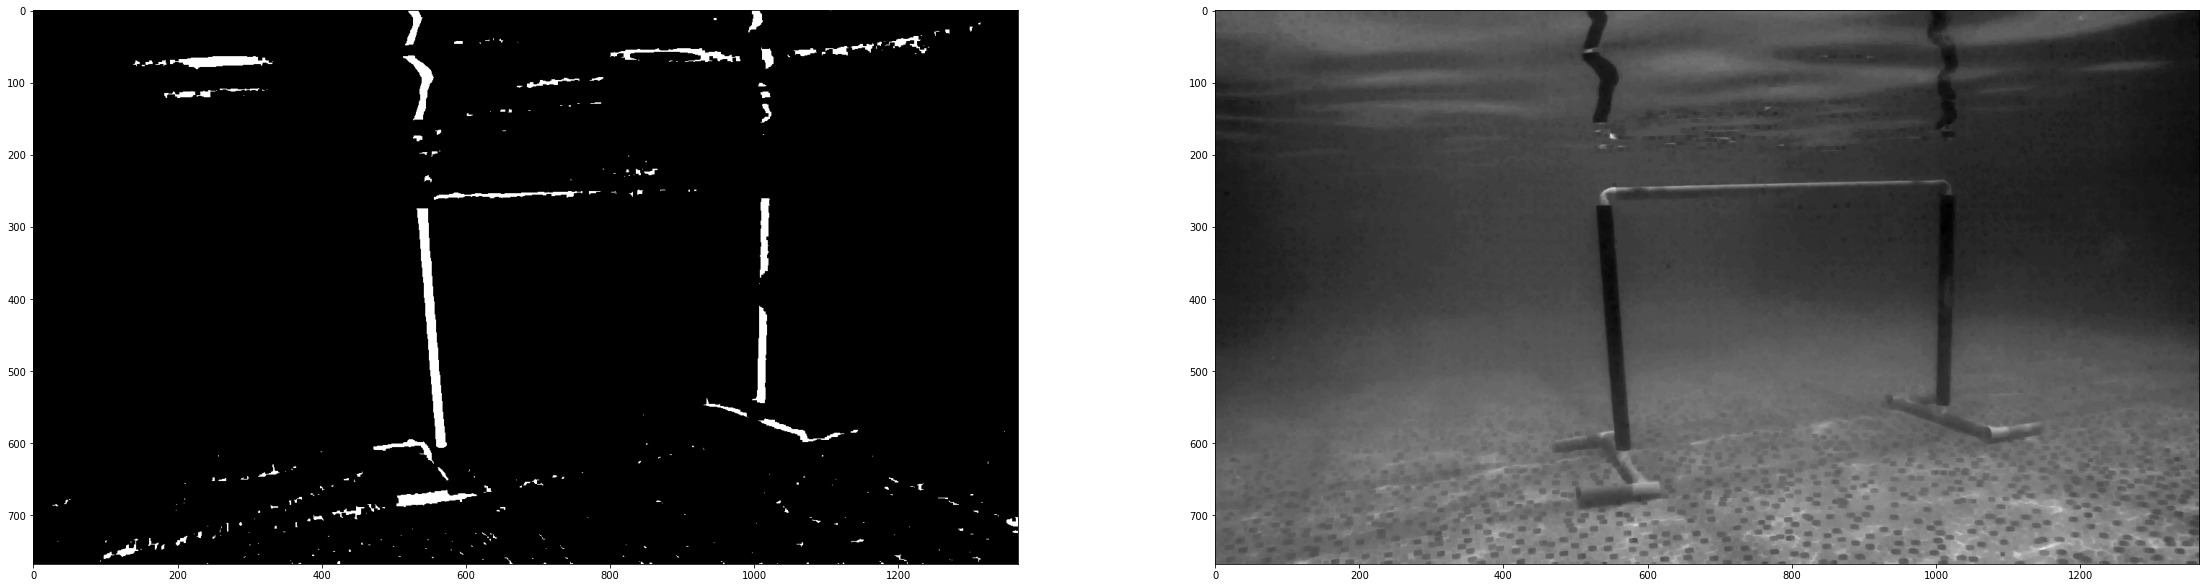

In [21]:
erode = cv2.morphologyEx(thresh2,cv2.MORPH_ERODE,kernel)
erode_org = cv2.morphologyEx(gray,cv2.MORPH_ERODE,kernel)
show_many([erode,erode_org])

all the above things with experimental kernal sizes

In [0]:
k = np.ones((7,7),dtype=np.uint16)

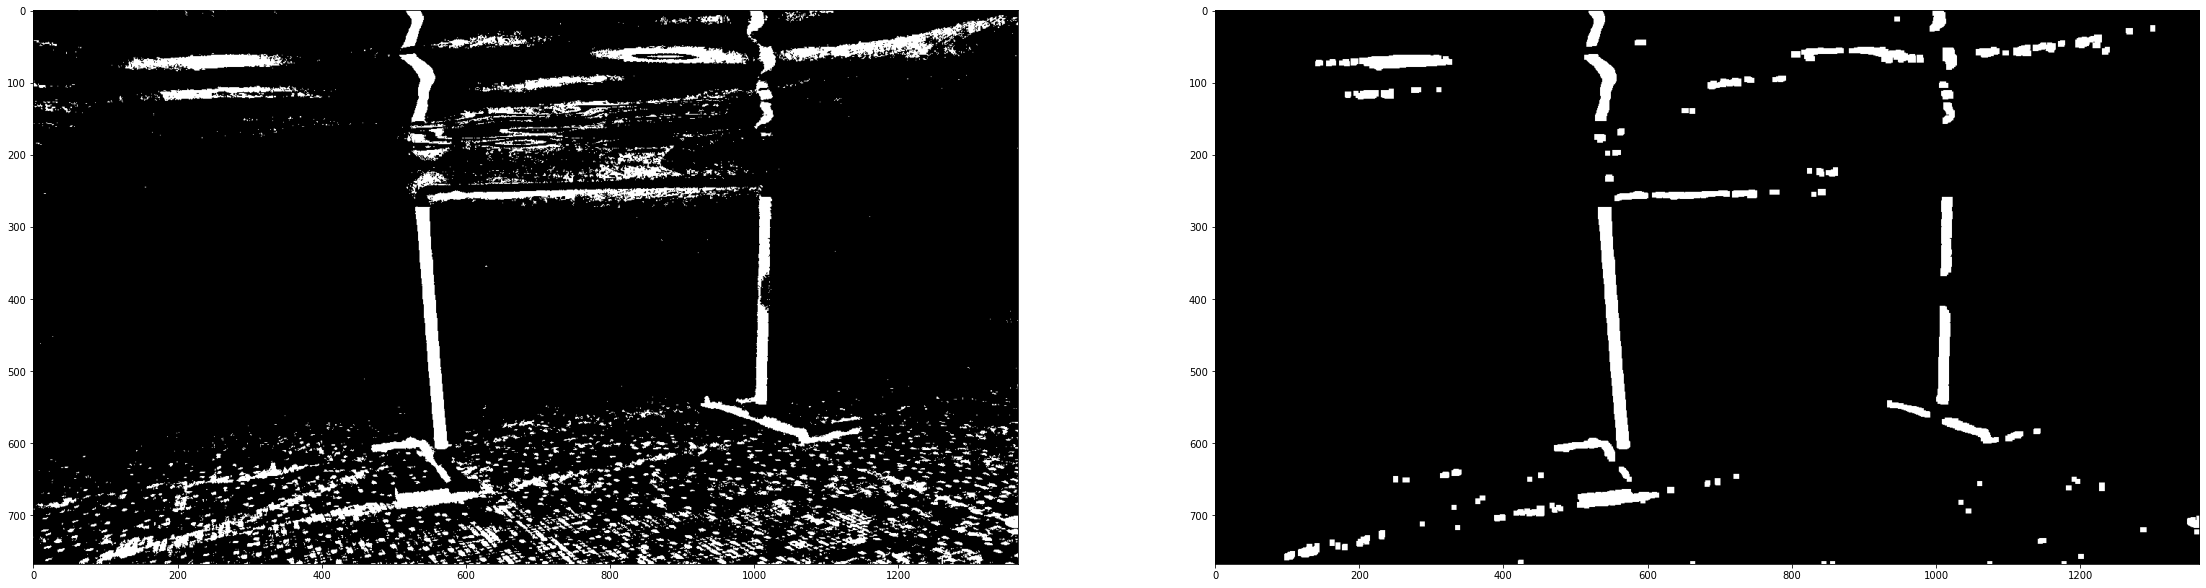

In [27]:
opening_2 = cv2.morphologyEx(thresh2,cv2.MORPH_OPEN,k)
show_many([thresh2,opening_2])

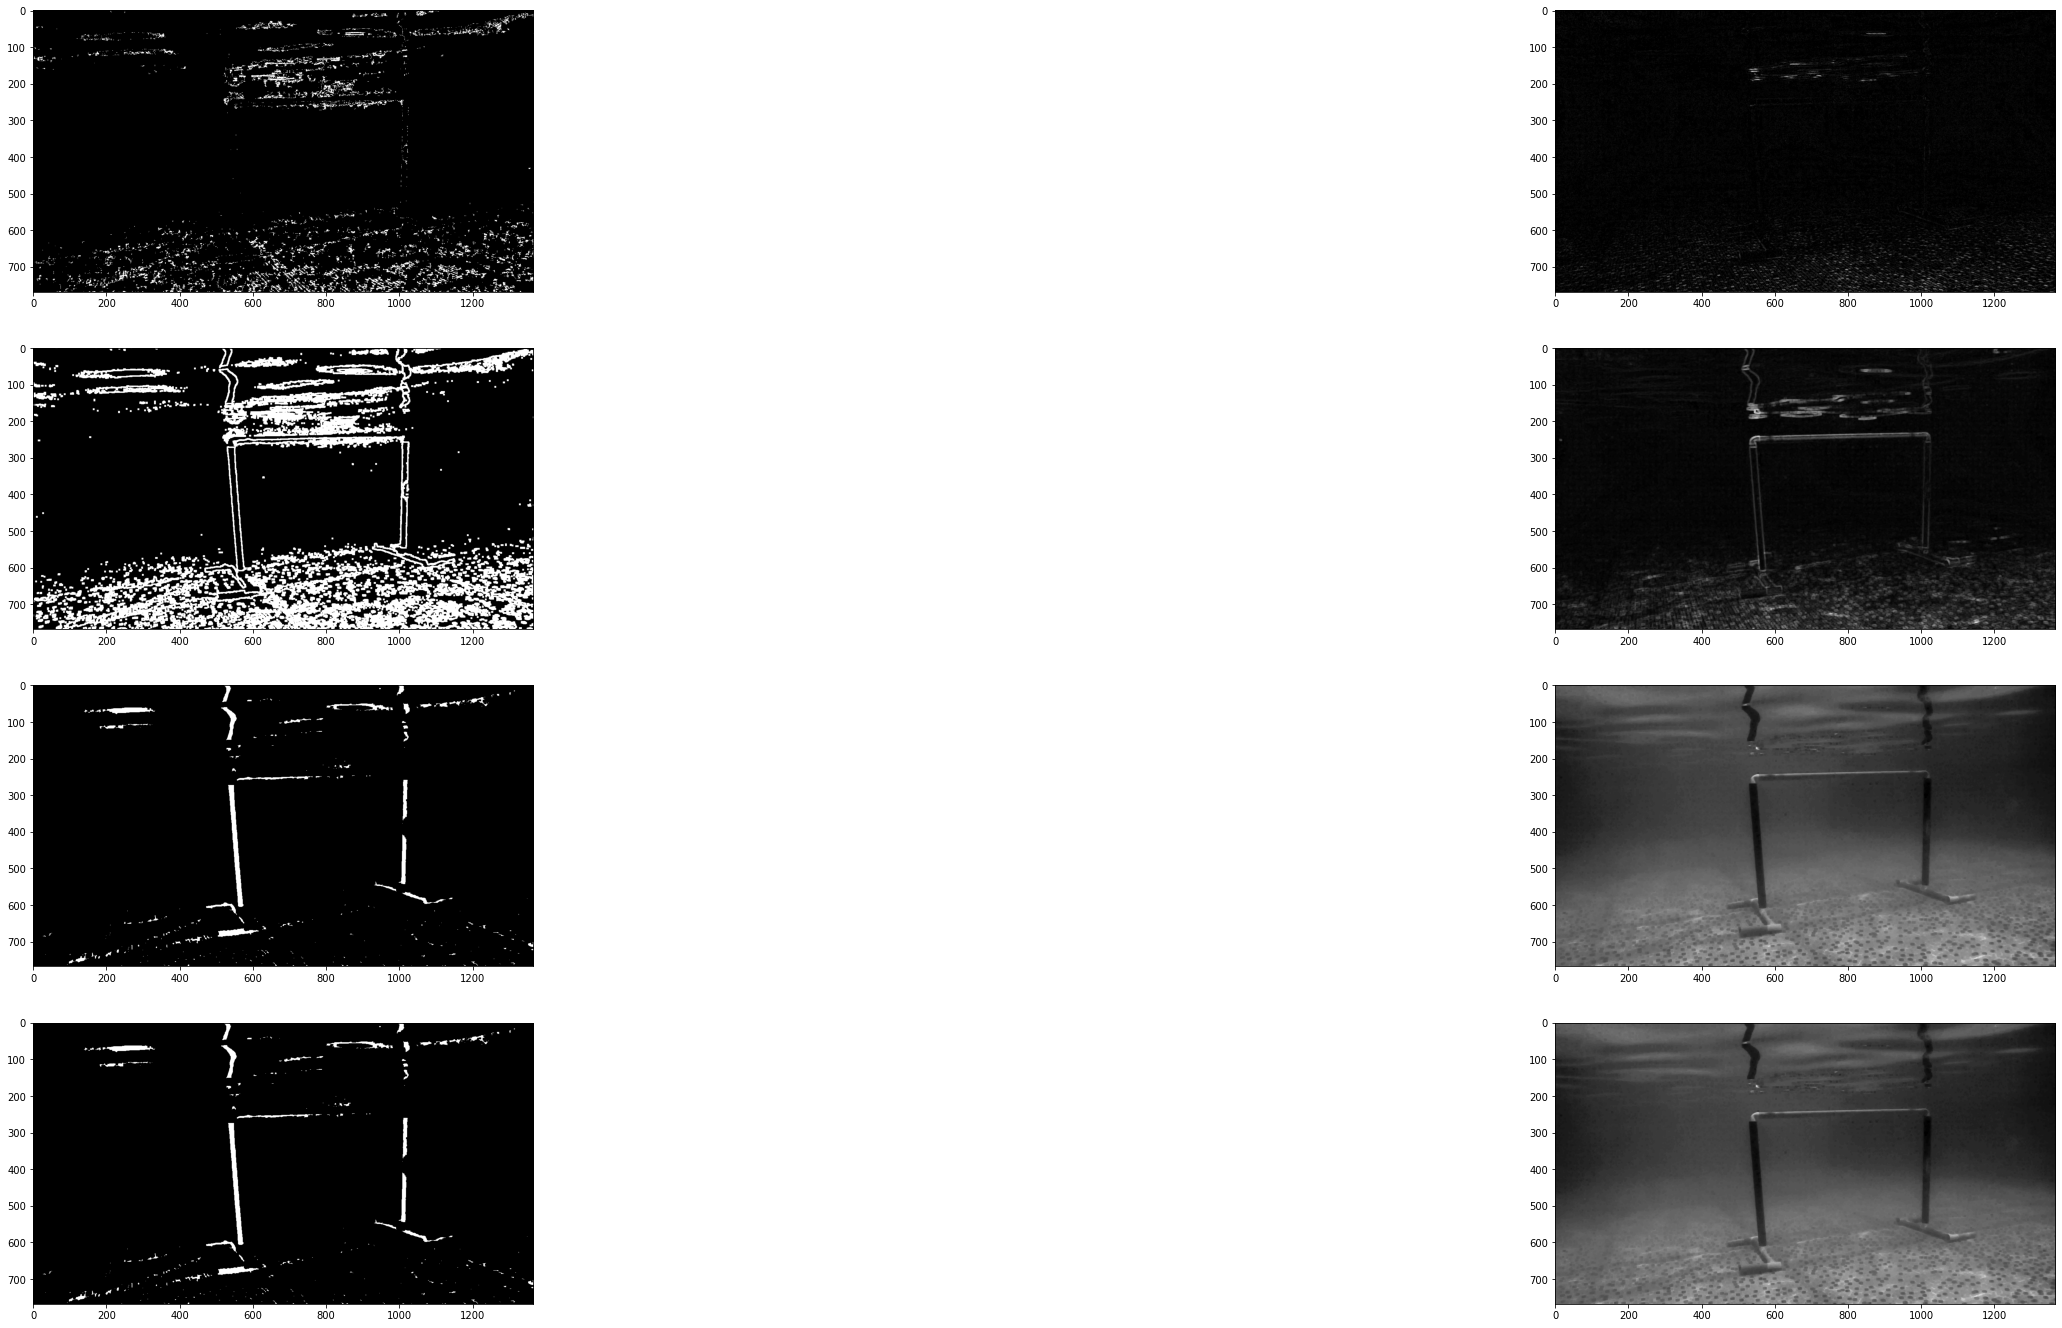

In [31]:
black_chat_2 = cv2.morphologyEx(thresh2,cv2.MORPH_BLACKHAT,kernel)
black_chat_org_2 = cv2.morphologyEx(gray,cv2.MORPH_BLACKHAT,kernel)
gradient_2 = cv2.morphologyEx(thresh2,cv2.MORPH_GRADIENT,kernel)
gradient_org_2 = cv2.morphologyEx(gray,cv2.MORPH_GRADIENT,kernel)
rect_2 = cv2.morphologyEx(thresh2,cv2.MORPH_RECT,kernel)
rect_org_2 = cv2.morphologyEx(gray,cv2.MORPH_RECT,kernel)
erode_2 = cv2.morphologyEx(thresh2,cv2.MORPH_ERODE,kernel)
erode_org_2 = cv2.morphologyEx(gray,cv2.MORPH_ERODE,kernel)
show_all([black_chat_2,black_chat_org_2,gradient_2,gradient_org_2,rect_2,rect_org_2,erode_2,erode_org_2])

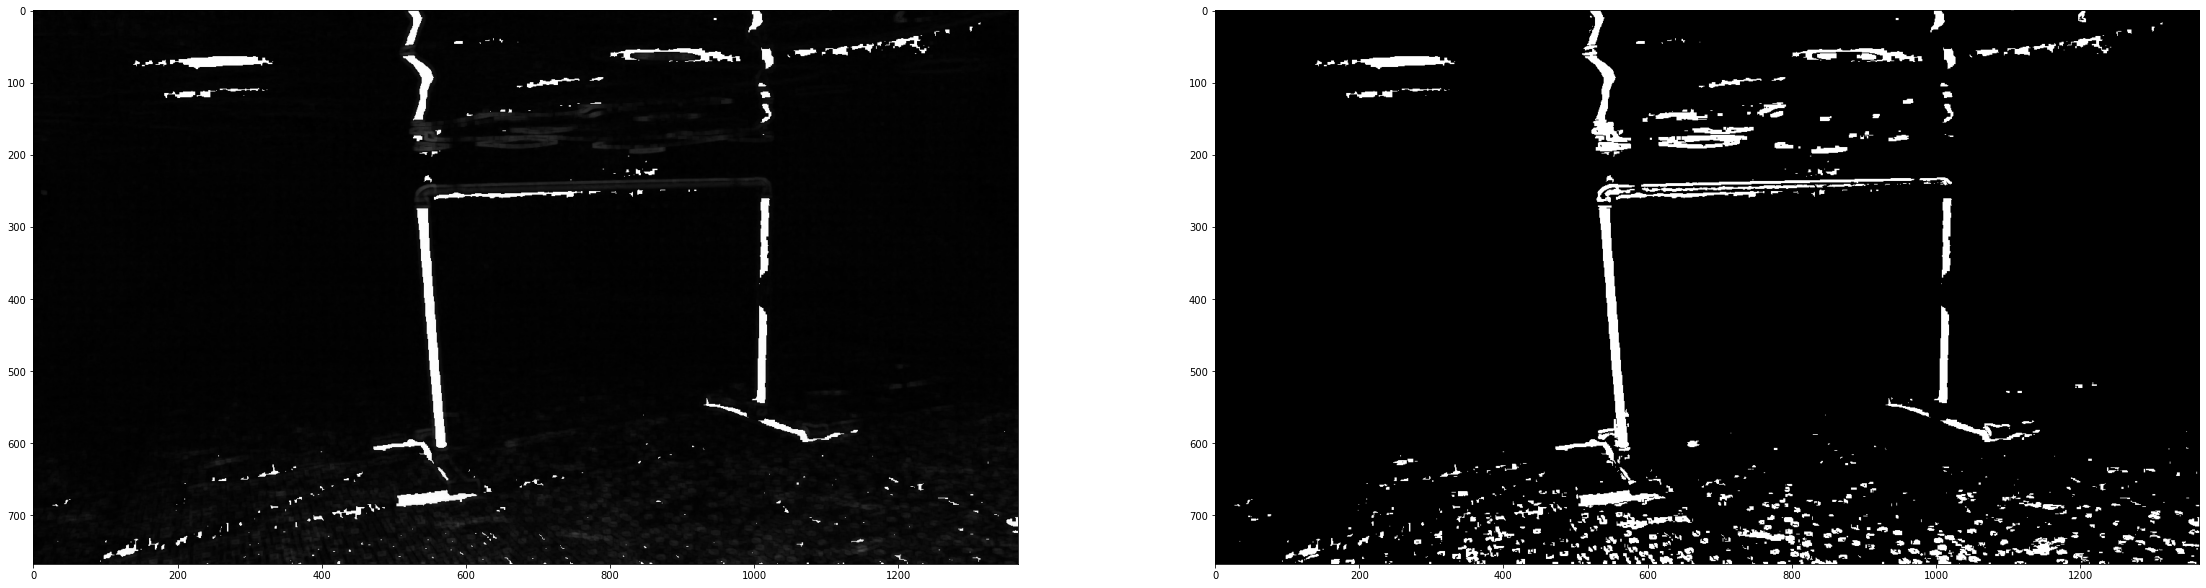

In [39]:
exp2 = cv2.bitwise_xor(erode_2,gradient_org_2)
ret,exp3 = cv2.threshold(exp2,20,255,cv2.THRESH_BINARY)
show_many([exp2,exp3])